In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# %reload_ext autoreload

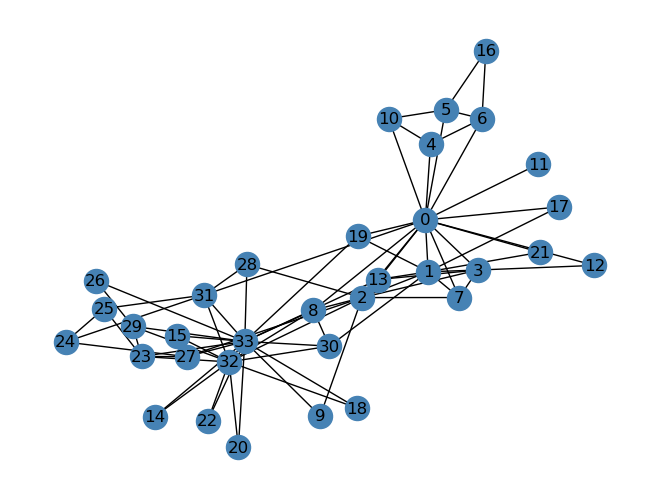

In [3]:
import networkx as nx
G = nx.karate_club_graph()
layout = nx.layout.fruchterman_reingold_layout(G)
nx.draw(G, layout, with_labels=True, node_color = "steelblue")

We need to return a vector of binary labels to split the graph.

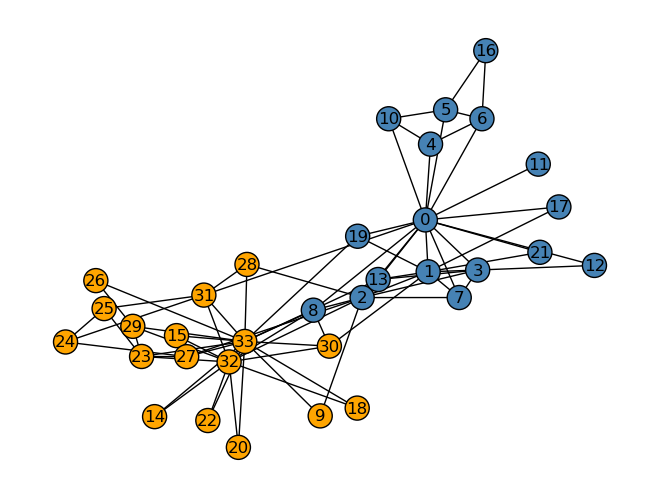

In [4]:
clubs = nx.get_node_attributes(G, "club")

nx.draw(G, layout,
        with_labels=True, 
        node_color = ["orange" if clubs[i] == "Officer" else "steelblue" for i in G.nodes()],
        edgecolors = "black" # confusingly, this is the color of node borders, not of edges
        ) 

# Implementing Laplacian Spectral Clustering 

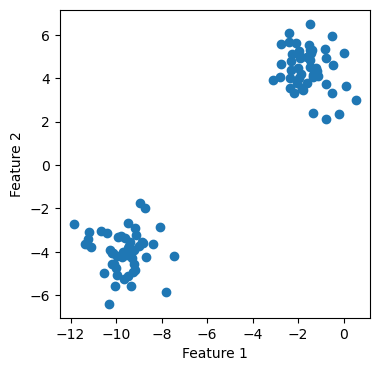

In [5]:
from sklearn.datasets import make_blobs, make_circles
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(12345)

fig, ax = plt.subplots(1, figsize = (4, 4))
X, y = make_blobs(n_samples=100, n_features=2, 
                                centers=2, random_state=1)

a = ax.scatter(X[:, 0], X[:, 1])
a = ax.set(xlabel = "Feature 1", ylabel = "Feature 2")

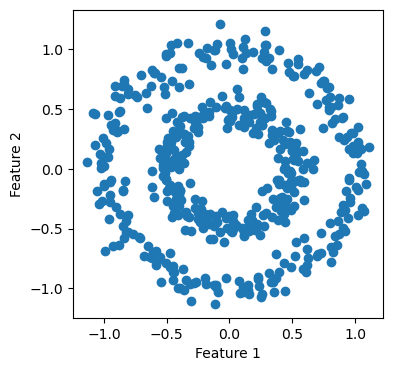

In [6]:
np.random.seed(42)

n = 500
X, y = make_circles(n_samples=n, shuffle=True, noise=0.07, random_state=None, factor = 0.5)

fig, ax = plt.subplots(1, figsize = (4, 4))
a = ax.scatter(X[:, 0], X[:, 1])
a = ax.set(xlabel = "Feature 1", ylabel = "Feature 2")

In [7]:
# testing
import numpy as np 
from numpy import linalg as LA
print(np.diag((1,1,1)))
w, v = LA.eig(np.diag((1, 2, 3)))
w, v

[[1 0 0]
 [0 1 0]
 [0 0 1]]


(array([1., 2., 3.]),
 array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]))

In [8]:
from sklearn.neighbors import NearestNeighbors

k = 10
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
A = nbrs.kneighbors_graph().toarray()

# symmetrize the matrix
A = A + A.T
A[A > 1] = 1

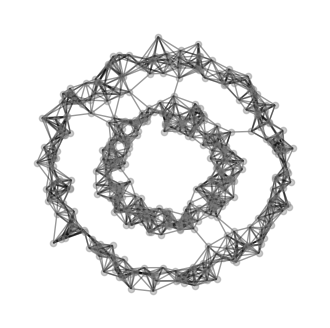

In [9]:
import networkx as nx
from hidden_spectral import spectral 
spectral.plot_graph(X, A)

In [10]:
# fig, axarr = plt.subplots(1, 2, figsize = (8, 4))
y_bad = np.random.randint(0, 2, n)

# plot_graph(X, A, z = y, ax = axarr[0])
# plot_graph(X, A, z = y_bad, ax = axarr[1])

In [11]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
def cut(A, z):
    D = pairwise_distances(z.reshape(-1, 1))
    return (A*D).sum()
    
print(f"good labels cut = {cut(A, z = y)}") 
print(f"bad labels cut = {cut(A, z = y_bad)}") 

def cut(A, z):
    D = pairwise_distances(z.reshape(-1, 1))
    return (A*D).sum()
    
print(f"good labels cut = {cut(A, z = y)}") 
print(f"bad labels cut = {cut(A, z = y_bad)}") 

good labels cut = 22.0
bad labels cut = 3000.0
good labels cut = 22.0
bad labels cut = 3000.0


# Use a theorem from linear algebra
$z$ should be the eigenvector with the second smallest eigenvalue of the matrix $$L = D^{-1}\left[ D-A \right]. $$ This matrix $L$ is called the normalized Laplacian.

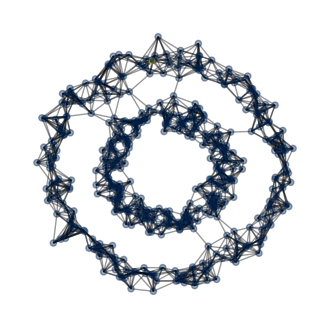

In [23]:
from hidden_spectral import spectral 
spec = spectral()
fig, ax = plt.subplots(figsize = (4, 4))
z_ = spec.second_laplacian_eigenvector(A=A)
spec.plot_graph(X, A, z=z_, ax = ax, show_edge_cuts = False)

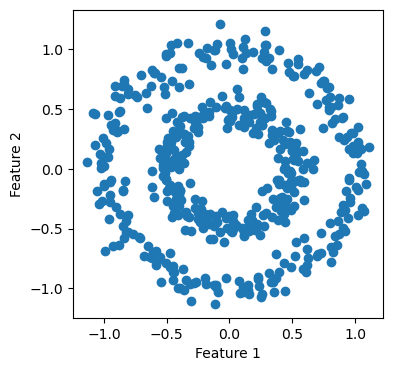

In [25]:
fig, ax = plt.subplots(figsize = (4, 4))
z = spec.spectral_clustering(X, n_neighbors = 6)
a = ax.scatter(X[:, 0], X[:, 1], c = z, cmap = plt.cm.cividis)
a = ax.set(xlabel = "Feature 1", ylabel = "Feature 2")

$$\mathcal{L}(a, b) = \sum_{i = 1}^n (ax_i + b - y_i)^2\;.$$